# <center> Digital Canonical Relation </center>

From paper _"An introduction to X-Ray tomography and Radon transform"_ by Eric Todd Quinto (Section 2.2 _"Wavefront sets and singularity detection").

## Definition of Ray Transform

With coordinates on the unit sphere $\mathbb{S}^1$, so to each angle $\phi\in[0,2\pi]$, with the unit vector in direction $\phi$ denoted as $\theta$ and $\theta^{\perp}$ as the unit vector $\pi/2$ units counterclock wise:

$$
\theta = \theta(\phi) = (\cos\phi, \sin\phi)\text{,}\quad \theta^{\perp} = \theta^{\perp}(\phi)= (-\sin\phi,\cos\phi)
$$

Then $[0,2\pi]$ can be identified as $\mathbb{S}^1$ with coordinates $\phi$. Let us define

$$
L(\phi,s)=\{x\in\mathbb{R}^2| x\cdot\theta\phi=s\}
$$

the line perepndicular to $\theta$ and with $s$ distance to the origin. 

The Radon transform $f\in L^1(\mathbb{R}^2)$ is given by:

$$
\mathcal{R}f(\phi,s)=\int_{x\in L(\phi,s)}f(x)dx_L = \int_{t=-\infty}^{\infty} f(s\theta+t\theta^{\perp})dt
$$

The Radon transform is a pseudodifferential operator, by using microlocal analysis, we can map the singularities of a function and the singularities of its Radon transform, we are naming this relation _the canonical relation_, and reads as follows. 

## The canonical relation

Let $f\in \epsilon^1(\mathbb{R}^2)$ be a two-dimensional distribution of compact support. Let $x_0\in L(\phi,s_0)$, $\theta_0 = \theta(\phi_0)$, $\eta_0 = ds - (x_0\cdot\theta_0^{\perp})d\phi$ and $a\neq 0$. The __canonical relation__ is the wavefront set correspondence

$$
(x_0; a\theta_0 dx)\in WF^{\alpha} (f) \Longleftrightarrow (\phi_0,s_0; a\eta_0)\in WF^{\alpha+1/2}(\mathcal{R}f)
$$

## The digital canonical relation

In the digital case the wavefront set is parametrized by the values $(x_0;\phi_0)$, where $x_0 = (x_{01}, x_{02})\in [0,N]^2$ and $\phi_0\in\{0,ldots,180\}$, therefore the forward and inverse operator that implements the canonical relation can be defined as follows.

### Forward canonical relation

$$
\mathbb{Can}^d: WF^d(f)\longrightarrow WF^d(\mathcal{R}f)
$$

Let $f\in \ell^2([0,N]^2)$, and $((x_{01},x_{02});\phi_0)\in WF^d(f)$, where $x_0\in [0,N]^2$ and $\phi_0\in\{0,\ldots,180\}$, therefore 

$$
\mathbb{Can}^d(((x_{01}, x_{02});\phi_0)) = ((s_0,\phi_0+90); \varphi_0)
$$

where 

$$
s_0 = x_0\cdot\theta(\phi_0+90) = 
\begin{cases}
-x_{01}\sin\phi_0+x_{02}\cos\phi_0 & \text{if } \phi_0\leq 90\\
x_{01}\sin\phi_0-x_{02}\cos\phi_0 & \text{if } \phi_0 > 90
\end{cases}
$$

and

$$
\varphi_0 = \arctan(-x_0\cdot\theta^{\perp}(\phi_0+90))=
\begin{cases}
-x_{01}\cos\phi_0-x_{02}\sin\phi_0 &  \phi_0\leq 90\\
x_{01}\cos\phi_0+x_{02}\sin\phi_0 &  \phi_0>90
\end{cases}
$$




### Inverse canonical relation

$$
(\mathbb{Can}^d)^{-1}: WF^d(\mathcal{R}f)\longrightarrow WF^d(f)
$$

Let $f\in\ell^2([0,N]^2)$ and $((s_0,\phi_0);\varphi_0)\in WF^d(\mathcal{R}f)$, where $s\in [0,N]$ and $\phi_0\in\{ 0,\ldots,180\}$, and $\varphi_0\in\{0,\ldots,180\}$, therefore 

$$
(\mathbb{Can}^d)^{-1}((s_0,\phi_0);\varphi_0) = ((x_{01},x_{02}); \phi_0-90)
$$

where

$$
x_{01} = s_0\cos\phi_0-\tan\varphi_0\sin\phi_0 
$$

and

$$
x_{02} = s_0\sin\phi_0+\tan\varphi_0\cos\phi_0 
$$

## Implementation

Lets import the relevant libraries

In [1]:
from ellipse.ellipseWF_factory import random_phantom, plot_WF
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np

In [2]:
import odl

### Forward canonical relation

Compute the position entry

In [3]:
def point_img2sino(x, phi, size, sinogram_shape):
    # Compute the angle in radians
    rad_phi = ((phi[0])*np.pi)/180
    # In the images the coordinates are switched and moved
    x01, x02 = x[1]-int(size/2), x[0]-int(size/2)
    # Compute the distance to center component
    if phi <= 90:
        dist_center = -x01*np.sin(rad_phi)+x02*np.cos(rad_phi)+int(sinogram_shape[1]/2)
    else:
        dist_center = x01*np.sin(rad_phi)-x02*np.cos(rad_phi)+int(sinogram_shape[1]/2)
    
    return np.array([dist_center,(phi+90)%180])

Compute the direction entry

In [4]:
def class_img2sino(x, phi, size, sinogram_shape):
    # Compute the angle in radians
    rad_phi = ((phi[0])*np.pi)/180
    # In the images the coordinates are switched and moved
    x01, x02 = x[1]-int(size/2), x[0]-int(size/2)
    # Compute the class
    if phi <= 90:
        classe = -x01*np.cos(rad_phi)-x02*np.sin(rad_phi)
    else:
        classe = x01*np.cos(rad_phi)+x02*np.sin(rad_phi)
    
    return np.array([((np.arctan(classe))*180/np.pi)%180+1])

Compute the corresponding positions and classes for all the points

In [5]:
def CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles):
    # Compute the WF points in the sinogram
    WFpoints_sino = []
    WFclasses_sino = []
    for i in range(WFpoints.shape[0]):
        if (WFclasses[i][0] % int(180/num_angles) == 0):
            WFpoints_sino.append(point_img2sino(WFpoints[i], WFclasses[i]-1, size, sinogram_shape))
            WFclasses_sino.append(class_img2sino(WFpoints[i], WFclasses[i]-1, size, sinogram_shape))

    return np.array(WFpoints_sino), WFclasses_sino

In [6]:
def WFupdate_sino(WFpoints, WFclasses, WFimage):
    # Function to update the Wavefront set classes with points and classes
    size = WFimage.shape[0]
    WFimage[WFpoints.astype(int)[:,1],WFpoints.astype(int)[:,0]] = np.array(WFclasses)[:,0]
    return WFimage

#### Experiments

__Ray transform defintion__

In [7]:
from ellipse.ellipseWF_factory import _ellipse_gen, _ellipse_grad_gen, Wavefrontset_ellipse_classes, WFupdate 

In [8]:
size = 256

In [9]:
# Create ODL data structures
space = odl.uniform_discr([-int(size/2), -int(size/2)], [int(size/2), int(size/2)], [size, size],
                          dtype='float32')

In [10]:
num_angles = 180
geometry = odl.tomo.parallel_beam_geometry(space, num_angles=num_angles)
operator = odl.tomo.RayTransform(space, geometry)

In [11]:
# Ensure operator has fixed operator norm for scale invariance
opnorm = odl.power_method_opnorm(operator)
operator = (1 / opnorm) * operator

__Circle__

In [12]:
center = [int(size/2), int(size/2)]
radius = 50
width, height = [radius, radius]
angle = 0
opacity = 1
nClasses = 180

In [13]:
circle = 1-_ellipse_gen(center,width, height, angle, size, opacity)

WFpoints, WFclasses = Wavefrontset_ellipse_classes(center, width, height, angle, nClasses)
WFimage = np.zeros(circle.shape)
WFimage = WFupdate(WFpoints, WFclasses, WFimage)

In [14]:
sinogram = np.array(operator(space.element(circle)))

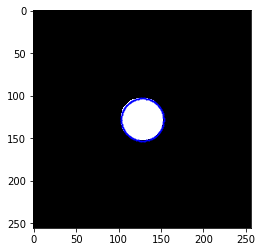

In [15]:
plt.imshow(circle, cmap = 'gray')
plt.plot(WFpoints[:,0], WFpoints[:,1], 'bo', markersize = 0.5)

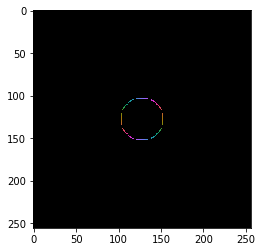

In [16]:
plot_WF(WFimage)

In [17]:
sinogram_shape = sinogram.shape

In [18]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

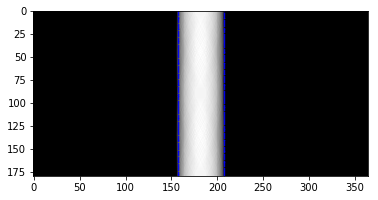

In [19]:
plt.imshow(sinogram, cmap = 'gray')
plt.plot(WFpoints_sino[:,0], WFpoints_sino[:,1], 'bo', markersize = 0.5)

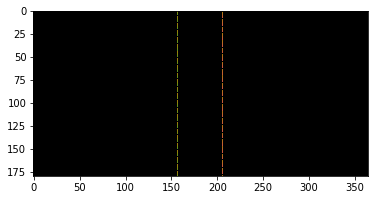

In [20]:
plot_WF(WFimage_sino)

__Ellipse__

In [21]:
center = [int(size/2), int(size/2)]
radius = 50
width, height = [radius, radius-10]
angle = 65
opacity = 1
nClasses = 180

In [22]:
ellipse = 1-_ellipse_gen(center,width, height, angle, size, opacity)

WFpoints, WFclasses = Wavefrontset_ellipse_classes(center, width, height, angle, nClasses)
WFimage = np.zeros(circle.shape)
WFimage = WFupdate(WFpoints, WFclasses, WFimage)

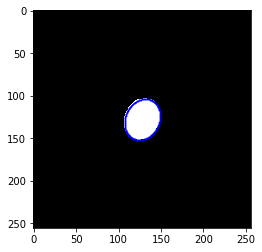

In [23]:
plt.imshow(ellipse, cmap = 'gray')
plt.plot(WFpoints[:,0], WFpoints[:,1], 'bo', markersize = 0.5)

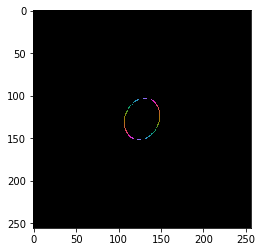

In [24]:
plot_WF(WFimage)

In [25]:
sinogram = np.array(operator(space.element(ellipse)))

In [26]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

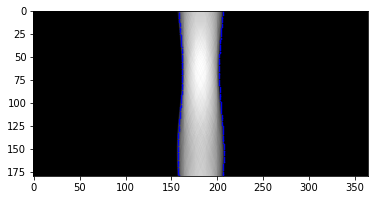

In [27]:
plt.imshow(sinogram, cmap='gray')
plt.plot(WFpoints_sino[:,0], (WFpoints_sino[:,1]), 'bo', markersize = 0.5)

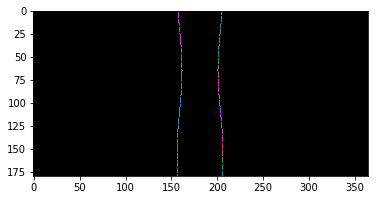

In [28]:
plot_WF(WFimage_sino)

__Phantom__

In [29]:
size = 256
nEllipses = 10
dirBias = 65
nClasses = 180

In [30]:
phantom, WFpoints, WFclasses,  WFimage = random_phantom(size, nEllipses, dirBias, nClasses)

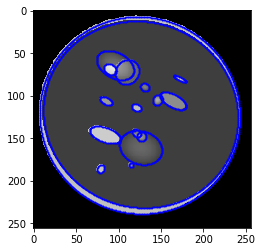

In [31]:
plt.imshow(phantom, cmap = 'gray')
plt.plot(WFpoints[:,0], WFpoints[:,1], 'bo', markersize = 0.5)

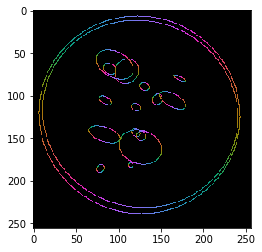

In [32]:
plot_WF(WFimage)

In [33]:
sinogram = np.array(operator(space.element(phantom)))

In [34]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

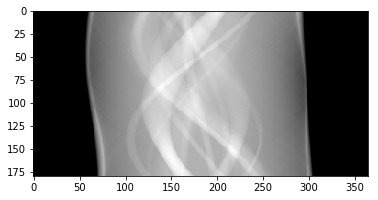

In [35]:
plt.imshow(sinogram, cmap='gray')

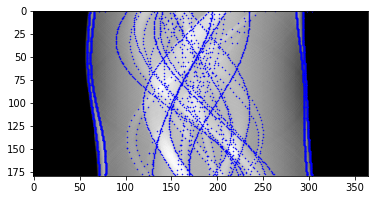

In [36]:
plt.imshow(sinogram, cmap='gray')
plt.plot(WFpoints_sino[:,0], WFpoints_sino[:,1], 'bo', markersize = 0.5)

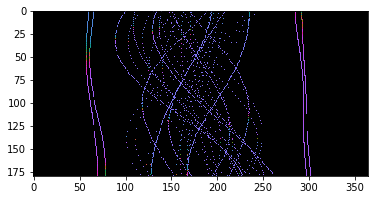

In [37]:
plot_WF(WFimage_sino)

### Inverse canonical relation

Compute the position entry

In [38]:
def point_sino2img(y, varphi, size, sinogram_shape):
    rad_varphi = ((varphi[0])*np.pi)/180
    s, phi =  y
    s = s - sinogram_shape[1]/2
    rad_phi =(phi*np.pi)/180
    x01 = s*np.cos(rad_phi)-np.tan(rad_varphi)*np.sin(rad_phi)
    x02 = s*np.sin(rad_phi)+np.tan(rad_varphi)*np.cos(rad_phi)
    
    return np.array([x02+int(size/2), x01+int(size/2)])

In [39]:
def CanRel_sino2img(WFpoints_sino, WFclasses_sino, size, sinogram_shape, num_angles):
    # Compute the WF points in the sinogram
    WFpoints = []
    WFclasses = []
    for i in range(WFpoints_sino.shape[0]):
        WFpoints.append(point_sino2img(WFpoints_sino[i], WFclasses_sino[i]-1, size, sinogram_shape))
        WFclasses.append(np.array([(WFpoints_sino[i][1]-90)%180]))
    return np.array(WFpoints), WFclasses

#### Experiments

#### Circle

In [40]:
center = [int(size/2), int(size/2)]
radius = 50
width, height = [radius, radius]
angle = 65
opacity = 1
nClasses = 180

In [41]:
circle = 1-_ellipse_gen(center,width, height, angle, size, opacity)

WFpoints, WFclasses = Wavefrontset_ellipse_classes(center, width, height, angle, nClasses)
WFimage = np.zeros(circle.shape)
WFimage = WFupdate(WFpoints, WFclasses, WFimage)

In [42]:
sinogram = np.array(operator(space.element(circle)))

In [43]:
sinogram_shape = sinogram.shape

In [44]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

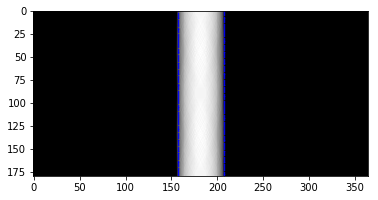

In [45]:
plt.imshow(sinogram, cmap = 'gray')
plt.plot(WFpoints_sino[:,0],WFpoints_sino[:,1], 'bo', markersize = 0.5)

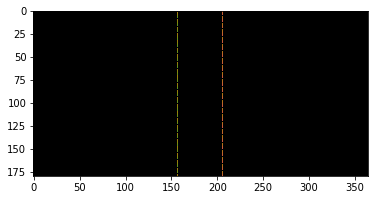

In [46]:
plot_WF(WFimage_sino)

In [47]:
WFpoints_canon, WFclasses_canon = CanRel_sino2img(WFpoints_sino, WFclasses_sino, size, sinogram_shape, num_angles)
WFimage_canon = np.zeros([size,size])
WFimage_canon = WFupdate(WFpoints_canon, WFclasses_canon, WFimage_canon)

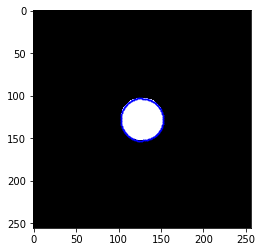

In [48]:
plt.imshow(circle, cmap = 'gray')
plt.plot(WFpoints_canon[:,0],WFpoints_canon[:,1], 'bo', markersize = 0.5)

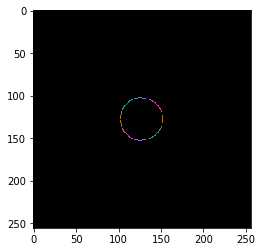

In [49]:
plot_WF(WFimage_canon)

#### Ellipse

In [50]:
center = [int(size/2)+30, int(size/2)]
radius = 50
width, height = [radius+20, radius]
angle = 65
opacity = 1
nClasses = 180

In [51]:
circle = 1-_ellipse_gen(center,width, height, angle, size, opacity)

WFpoints, WFclasses = Wavefrontset_ellipse_classes(center, width, height, angle, nClasses)
WFimage = np.zeros(circle.shape)
WFimage = WFupdate(WFpoints, WFclasses, WFimage)

In [52]:
sinogram = np.array(operator(space.element(circle)))

In [53]:
sinogram_shape = sinogram.shape

In [54]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

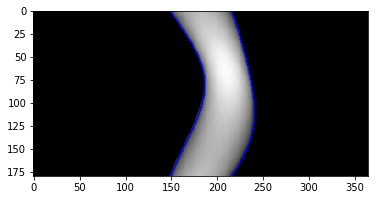

In [55]:
plt.imshow(sinogram, cmap = 'gray')
plt.plot(WFpoints_sino[:,0],WFpoints_sino[:,1], 'bo', markersize = 0.5)

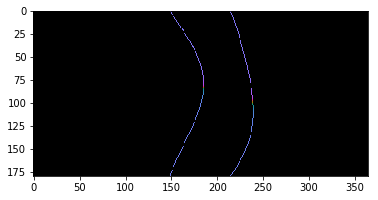

In [56]:
plot_WF(WFimage_sino)

In [57]:
WFpoints_canon, WFclasses_canon = CanRel_sino2img(WFpoints_sino, WFclasses_sino, size, sinogram_shape, num_angles)
WFimage_canon = np.zeros([size,size])
WFimage_canon = WFupdate(WFpoints_canon, WFclasses_canon, WFimage_canon)

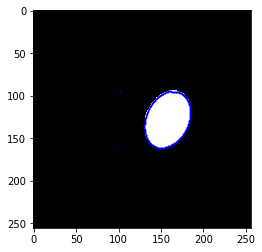

In [58]:
plt.imshow(circle, cmap = 'gray')
plt.plot(WFpoints_canon[:,0],WFpoints_canon[:,1], 'bo', markersize = 0.5)

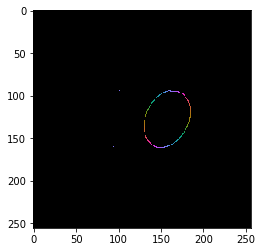

In [59]:
plot_WF(WFimage_canon)

#### Phantom

In [60]:
size = 256
nEllipses = 10
dirBias = 65
nClasses = 180

In [61]:
phantom, WFpoints, WFclasses,  WFimage = random_phantom(size, nEllipses, dirBias, nClasses)

In [62]:
sinogram = np.array(operator(space.element(phantom)))

In [63]:
WFpoints_sino, WFclasses_sino = CanRel_img2sino(WFpoints, WFclasses, size, sinogram_shape, num_angles)
WFimage_sino = np.zeros(sinogram.shape)
WFimage_sino = WFupdate_sino(WFpoints_sino, WFclasses_sino, WFimage_sino)

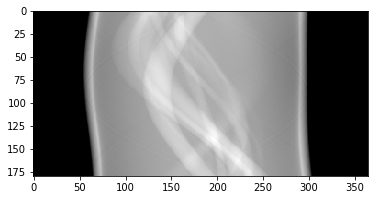

In [64]:
plt.imshow(sinogram, cmap = 'gray')

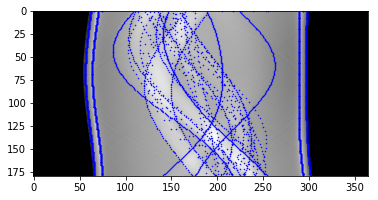

In [65]:
plt.imshow(sinogram, cmap = 'gray')
plt.plot(WFpoints_sino[:,0],WFpoints_sino[:,1], 'bo', markersize = 0.5)

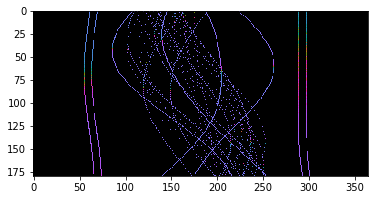

In [66]:
plot_WF(WFimage_sino)

In [67]:
WFpoints_canon, WFclasses_canon = CanRel_sino2img(WFpoints_sino, WFclasses_sino, size, sinogram_shape, num_angles)
WFimage_canon = np.zeros([size,size])
WFimage_canon = WFupdate(WFpoints_canon, WFclasses_canon, WFimage_canon)

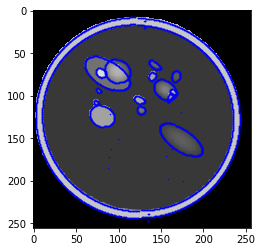

In [68]:
plt.imshow(phantom, cmap = 'gray')
plt.plot(WFpoints_canon[:,0],WFpoints_canon[:,1], 'bo', markersize = 0.5)

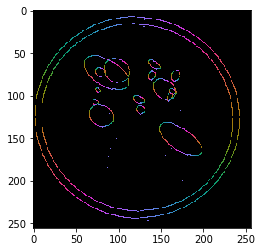

In [69]:
plot_WF(WFimage_canon)